Pre-fit      a = -3.2297e+01 , b = -1.5185e-02 , Ta = 8.4432e+03
Fincal-fit   A = 1.8586e-16 , b = 3.6411e-01 , Ta = 1.1418e+04
Chi - Square of Final-fit:  3.2460e-31


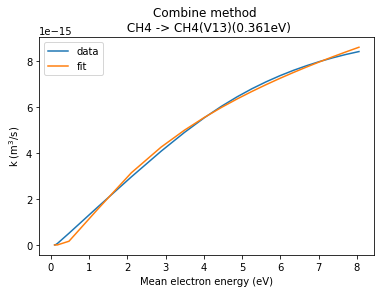

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as co

from scipy.optimize import curve_fit

def Arrhenius(TeV,a,b,Ta):
    # Arrhenius function in [m3/s]
    # we must convert TeV in eV into Kelvin
    # by multiply with e/kB
    T = TeV * co.e / co.k * 2/3
    A = np.exp(a)
    return A* T**b *np.exp(-Ta/T)

def Arr_reduced(T,a,b,Ta):
    return a + b*np.log(T) - Ta/T

def Chisquare(y_data, y_fit):
    return np.sum((y_data-y_fit)**2)

###################################################
# INPUT DATA FOR FITTING
input_file = 'CH4(V13)(0361eV)Bolsig.dat'
data = np.loadtxt(input_file)
x1 = data[:,0]*co.e/co.k *2/3   # electron temperature K
y1 = np.log(data[:,1])          # rate coefficient m3/s
n = len(x1)
x2 = data[:,0]                  # Mean electron energy eV
y2 = data[:,1]                  # rate coefficient m3/s

# Fit by least chi - square method
c, cov = curve_fit(Arr_reduced, x1, y1)           # Fit by Logarithm Equation
c2, cov2 = curve_fit(Arrhenius, x2, y2, p0 = c)    # Re-Fit by Original Equation
print('Pre-fit      a = %10.4e , b = %10.4e , Ta = %10.4e' % (c[0], c[1], c[2]))
print('Fincal-fit   A = %10.4e , b = %10.4e , Ta = %10.4e' % (np.exp(c2[0]), c2[1], c2[2]))


y_fit2 = np.empty_like(x1)
for i in range(n):
    y_fit2[i] = Arrhenius(x2[i],c2[0],c2[1],c2[2])   # m3/s

chisq_fit2 = Chisquare(y2,y_fit2)
print('Chi - Square of Final-fit:  %10.4e'% chisq_fit2)

plt.figure()
plt.plot(x2,y2,label = 'data')
plt.plot(x2,y_fit2,label = 'fit')
plt.legend()
plt.title('Combine method \n CH4 -> CH4(V13)(0.361eV)')
plt.xlabel('Mean electron energy (eV)')
plt.ylabel('k (m$^\mathdefault{3}$/s)')
plt.show()